In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [3]:
# Charger les données préparées
train = pd.read_csv("../data/train_ready.csv")

# Normalisation des données
scaler = StandardScaler()
numeric_cols = train.select_dtypes(include=['number']).columns
train_scaled = scaler.fit_transform(train[numeric_cols])


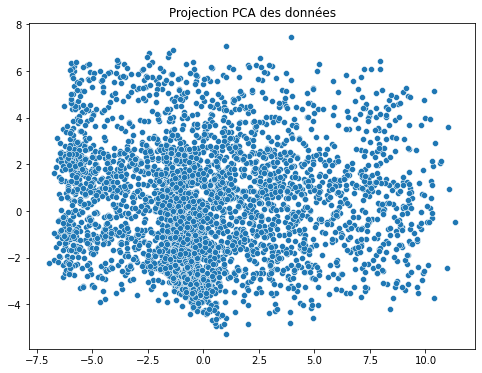

In [4]:
# Réduction de dimension avec PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1])
plt.title("Projection PCA des données")
plt.show()



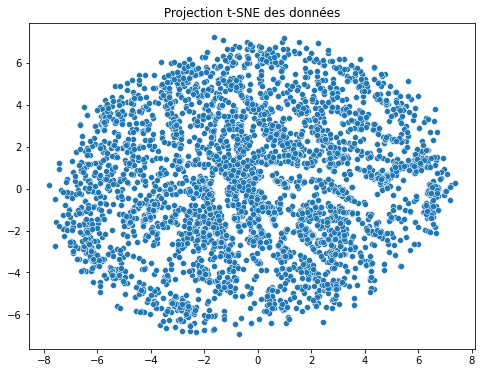

In [6]:
# Visualisation avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1])
plt.title("Projection t-SNE des données")
plt.show()


In [7]:
#  Détection des anomalies avec Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_scores = iso_forest.fit_predict(train_scaled)
train["Anomaly_Score"] = anomaly_scores


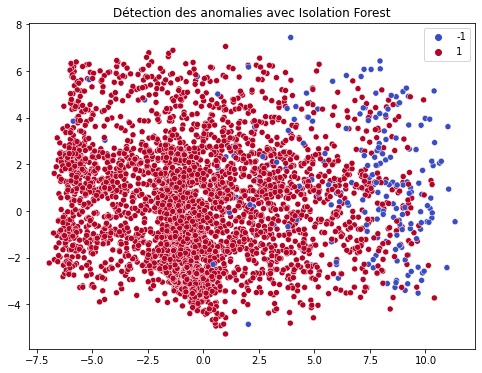

In [8]:
# Visualisation des anomalies
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=anomaly_scores, palette="coolwarm")
plt.title("Détection des anomalies avec Isolation Forest")
plt.show()

In [9]:
# Sauvegarde des résultats
train.to_csv("../data/train_analyzed.csv", index=False)
print("Les résultats de l'analyse non supervisée ont été sauvegardés dans data/train_analyzed.csv")

Les résultats de l'analyse non supervisée ont été sauvegardés dans data/train_analyzed.csv
